In [69]:
import numpy as np
# https://www.youtube.com/watch?v=cJ21moQpofY
# video explica bem

num_items = 5 # numero de items totais
capacidade_mochila = 7 # peso maximo que a mochila leva
valor_items = [2,2,4,5,3] # valor de cada item
pesos_items = [3,1,3,4,2] # peso de cada item

'''capacidade_mochila = 20000
valor_items = [random.randint(10,150) for x in range(0,500)]
pesos_items = [random.randint(1,50) for x in range(0,500)]
num_items = 500'''

def mochila(n,c,vl,ps):
    m = np.zeros((n,c))

    for i in range(n):
        for k in range(c):
            if i != 0 and k != 0:
                if ps[i-1] <= k:
                  m[i][k] = max(vl[i-1] + m[i-1][k-ps[i-1]],m[i-1][k])
                else:
                  m[i][k] = m[i-1][k]
    
    return m

m = mochila(num_items+1,capacidade_mochila+1,valor_items,pesos_items)

print(m)
print(np.max(m))

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  2.  2.  2.  2.]
 [ 0.  2.  2.  2.  4.  4.  4.  4.]
 [ 0.  2.  2.  4.  6.  6.  6.  8.]
 [ 0.  2.  2.  4.  6.  7.  7.  9.]
 [ 0.  2.  3.  5.  6.  7.  9. 10.]]
10.0


Seed was: 52413
capacidade_mochila: 1000
capacidade solucao: 985
solucao: [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
beneficio solucao: 3621
tempo execucao simulated annealing: 0.10873818397521973
melhor beneficio possivel: 3633.0
tempo execucao algoritmo normal: 0.05559039115905762


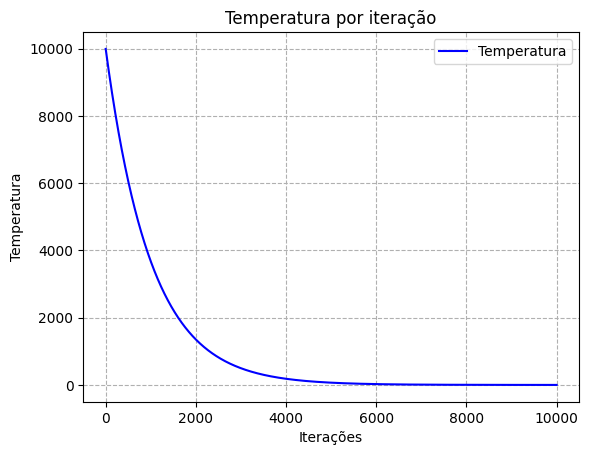

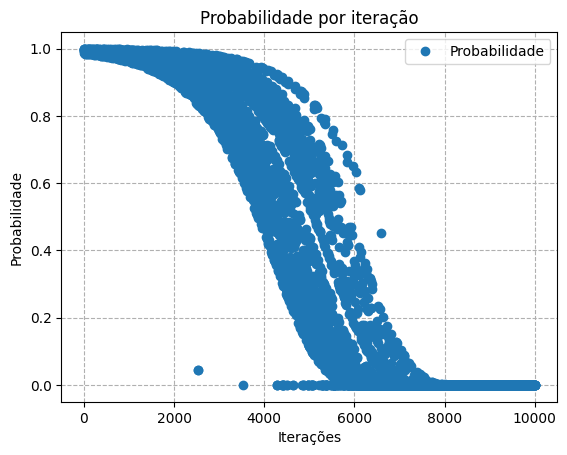

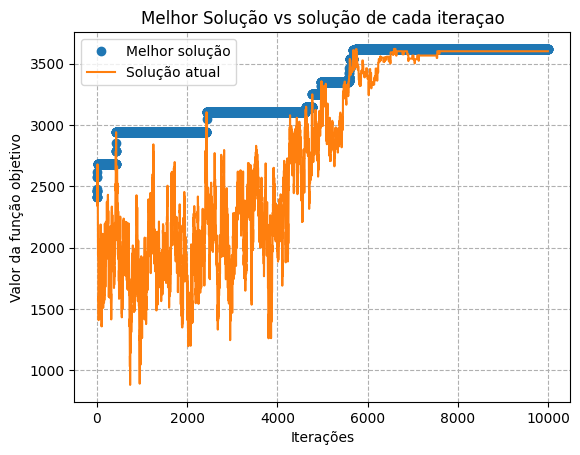

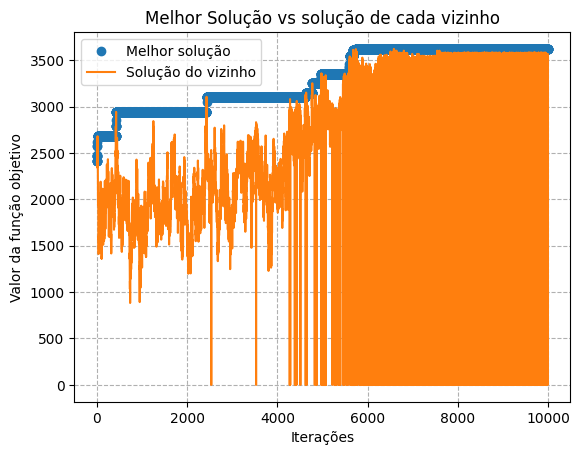

In [85]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import time

# https://www.youtube.com/watch?v=w2rBcPo88XM 
# video do simulated coiso que a stora meteu ate explica bem a cena da temepratua
#random.seed(2)

'''num_items = 5
capacidade_mochila = 7
valor_items = [2,2,4,5,3]
pesos_items = [3,1,3,4,2]

temperatura = 100
iteracoes = 100
arrefecer = 0.95'''

'''capacidade_mochila = random.randint(450,550)
valor_items = [random.randint(2,7) for x in range(0,100)]
pesos_items = [random.randint(1,6) for x in range(0,100)]
num_items = len(valor_items)

temperatura = 1000
iteracoes = 900
arrefecer = 0.99'''


seed = random.randrange(100000)
rng = random.Random(seed)
print("Seed was:", seed)

capacidade_mochila = 1000
valor_items = [random.randint(10,150) for x in range(0,50)]
pesos_items = [random.randint(1,50) for x in range(0,50)]
num_items = 50

temperatura = 10000
iteracoes = 10000
arrefecer = 0.999

'''capacidade_mochila = random.randint(4000,6000)
valor_items = [random.randint(20,70) for x in range(0,200)]
pesos_items = [random.randint(11,60) for x in range(0,200)]
num_items = len(valor_items)

temperatura = 10000
iteracoes = 10000
arrefecer = 0.999'''


lista_temp = []
lista_prob = []
lista_melhor = []
lista_atual = []
lista_visinho = []

'''
num_items = 3
capacidade_mochila = 50
valor_items = [60, 100, 120]
pesos_items = [10, 20, 30]'''

# isto calcula o valor e os pesos da escolha de objetos que metes aqui
def calc_valor(solucao):
    valor = 0
    peso = 0
    for i in range(num_items):
        valor += solucao[i] * valor_items[i]
        peso += solucao[i] * pesos_items[i]
    if peso > capacidade_mochila:
        return -1
    return valor

def sim_an(num, temp, iter,arr):
    global lista_temp, lista_atual, lista_melhor, lista_prob, lista_visinho

    # comecar com uma solucao aleatoria
    solucao_temp = [random.choice([0,1]) for nada in range(num)]
    maximo_temp = calc_valor(solucao_temp)

    maximo = maximo_temp
    solucao = solucao_temp[:]

    for zero in range(iter):
        
        # vai alterando a temperatura a cada iteracao
        temp *= arr
        lista_temp.append(temp)

        # faz o vizinho a partir da solucao atual, calcula o seu valor
        visinho = solucao_temp[:]
        i = random.randint(0,num-1)
        visinho[i] = 1 - visinho[i]
        visinho_val = calc_valor(visinho)
        
        # calcula a probabilidade
        if temp < 0.01 or (visinho_val - maximo_temp) / temp < -700:
            prob = 0
        elif (visinho_val - maximo_temp) / temp > 700:
            prob = 1
        else:
            prob = min(1,math.exp((visinho_val - maximo_temp) / temp)) # aqui vejo o minimo pq as vezes a prob ultrapassa o 1 e n quero isso

        if prob == 1:
            lista_prob.append(None)
        else:
            lista_prob.append(prob)

        # muda o valor atual dependendo ou da probabilidade ou do valor do vizinho
        # se o valor do vizinho for maior que o maior valor entra
        # ou entao se a probabilidade deixar entra, temperatura mais altas mais chance de entrar
        '''if random.random() > prob:
            print(str(zero)+".."+str(visinho_val)+"---"+str(maximo_temp))
            print((visinho_val - maximo_temp) / temp)'''
        if visinho_val > maximo_temp or random.random() < prob:
            maximo_temp = visinho_val
            solucao_temp = visinho[:]

            if maximo_temp > maximo:
                maximo = maximo_temp
                solucao = solucao_temp[:]
        
        lista_melhor.append(maximo)
        lista_atual.append(maximo_temp)
        lista_visinho.append(visinho_val)

    return maximo, solucao

inicio = time.time()
maximo, solucao = sim_an(num_items,temperatura,iteracoes,arrefecer)
fim = time.time()
p = 0
for i in range(0,num_items):
    p += solucao[i]*pesos_items[i]
print("capacidade_mochila: " +str(capacidade_mochila))
print("capacidade solucao: "+str(p)) 
#print(lista_temp)
#print(lista_prob)
print("solucao: "+str(solucao))
print("beneficio solucao: "+str(maximo))
print("tempo execucao simulated annealing: "+str(fim-inicio))

#print("provisorio 18045.0")

inicio = time.time()
print("melhor beneficio possivel: "+str(np.max(mochila(num_items+1,capacidade_mochila+1,valor_items,pesos_items))))
fim = time.time()
print("tempo execucao algoritmo normal: "+str(fim-inicio))

plt.plot(list(range(0,iteracoes)), lista_temp, color='blue', label='Temperatura')
plt.title('Temperatura por iteração')
plt.xlabel('Iterações')
plt.ylabel('Temperatura')
plt.grid(True, linestyle='--')
plt.legend()

plt.show()

plt.plot(list(range(0,iteracoes)), lista_prob,'o', label='Probabilidade')
plt.title('Probabilidade por iteração')
plt.xlabel('Iterações')
plt.ylabel('Probabilidade')
plt.grid(True, linestyle='--')
plt.legend()

plt.show()

plt.plot(list(range(0,iteracoes)), lista_melhor, 'o', label='Melhor solução')
plt.plot(list(range(0,iteracoes)), lista_atual, '-', label='Solução atual')
plt.title('Melhor Solução vs solução de cada iteraçao')
plt.xlabel('Iterações')
plt.ylabel('Valor da função objetivo')
plt.grid(True, linestyle='--')
plt.legend()

plt.show()

plt.plot(list(range(0,iteracoes)), lista_melhor, 'o', label='Melhor solução')
plt.plot(list(range(0,iteracoes)), lista_visinho, '-', label='Solução do vizinho')
plt.title('Melhor Solução vs solução de cada vizinho')
plt.xlabel('Iterações')
plt.ylabel('Valor da função objetivo')
plt.grid(True, linestyle='--')
plt.legend()

Seed was: 72994
melhor beneficio possivel: 3739.0
tempo execucao algoritmo normal: 0.07571268081665039
--------
capacidade solucao 993
tempo execuçao 0.5838594436645508
Best solution: [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
Best value: 3730


Error in callback <function _draw_all_if_interactive at 0x7456d79e6050> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

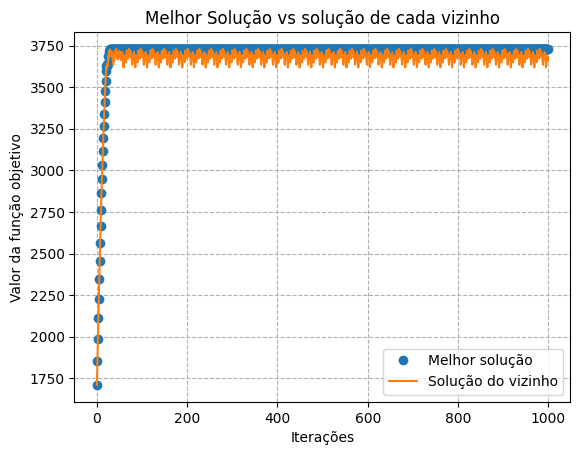

In [ ]:
#random.seed(2)
'''capacidade_mochila = random.randint(300,350)
valor_items = [random.randint(2,7) for x in range(0,100)]
pesos_items = [random.randint(1,6) for x in range(0,100)]
num_items = len(valor_items)
tamanho = 5
iteracoes = 60'''

capacidade_mochila = 1000
valor_items = [random.randint(10,150) for x in range(0,50)]
pesos_items = [random.randint(1,50) for x in range(0,50)]
num_items = 50
tamanho = 20
iteracoes = 50

lista_atual = []
lista_melhor = []
lista_tabu = [[]]

seed = random.randrange(100000)
rng = random.Random(seed)
print("Seed was:", seed)

'''num_items = 5
capacidade_mochila = 7
valor_items = [2,2,4,5,3]
pesos_items = [3,1,3,4,2]
iteracoes = 100
tamanho = 5'''
inicio = time.time()
print("melhor beneficio possivel: "+str(np.max(mochila(num_items+1,capacidade_mochila+1,valor_items,pesos_items))))
fim = time.time()
print("tempo execucao algoritmo normal: "+str(fim-inicio))
# calcular o valor da solucao
def calc_valor(solucao):
    valor = 0
    peso = 0
    for i in range(num_items):
        valor += solucao[i] * valor_items[i]
        peso += solucao[i] * pesos_items[i]
    avaliacao = valor * (1 - max(0, peso-capacidade_mochila)) # funcao pra maximizar
    
    return avaliacao

# fazer os vizinhos
def vizinhos(solucao):
    vizinho_lista = []
    # faz um vizinho diferente para cada posicao da lista da solucao
    for i in range(num_items):
        vizinho = solucao[:]
        vizinho[i] = 1 - vizinho[i]  # troca o valor de apenas 1 elemento do vizinho
        vizinho_lista.append(vizinho)
    return vizinho_lista


def tabu(num_items,iteracoes, tabu_tam):
    
    # comeca com uma solucao random
    solucao_atual = [random.choice([0, 1]) for _ in range(num_items)]
    valor_atual = calc_valor(solucao_atual)

    solucao_melhor = solucao_atual[:]
    valor_melhor = valor_atual

    tabu_lista = []

    for _ in range(iteracoes):
        vizinhos_todos = vizinhos(solucao_atual)

        # fazer os vizinhos e ver os que nao estao na lista do tabu
        candidate_solutions = [[]]
        for vizinho in vizinhos_todos:
            vizinho_valor = calc_valor(vizinho)
            if vizinho not in tabu_lista:
                candidate_solutions.append([vizinho, vizinho_valor])
        
        candidate_solutions.pop(0)

        # ver o melhor vizinho de todos eles
        melhor_candidato = candidate_solutions[0]
        for i in candidate_solutions:
            if i[1] > melhor_candidato[1]:
                melhor_candidato = i

        # dar update dependendo do melhor vizinho
        solucao_atual = melhor_candidato[0]
        valor_atual = melhor_candidato[1]

        lista_atual.append(valor_atual)

        # update ao melhor de todos
        if valor_atual > valor_melhor:
            solucao_melhor = solucao_atual[:]
            valor_melhor = valor_atual

        # update a lista tabu
        tabu_lista.append(solucao_atual)
        if len(tabu_lista) > tabu_tam:
            tabu_lista.pop(0)
        #print(tabu_lista)
        #print("----------------------------")
        lista_melhor.append(valor_melhor)
        #lista_tabu.append(np.mean(np.array([i for i in tabu_lista])))
        #lista_tabu.append(tabu_lista)

    return solucao_melhor, valor_melhor


inicio = time.time()
solucao, valor = tabu(num_items,iteracoes,tamanho)
fim = time.time()

p = 0
for i in range(0,num_items):
    p += solucao[i]*pesos_items[i]

print("--------")
print("capacidade solucao "+str(p))
print("tempo execuçao "+str(fim - inicio))
print("Best solution:", solucao)
print("Best value:", valor)
#print(lista_atual)
#print(lista_melhor)
#print(lista_tabu)
#lista_tabu2 = np.array(lista_tabu)
#print(lista_tabu2)
lissss = []

'''for i in lista_tabu2:
    yerp = []
    for j in i:
        yerp.append(calc_valor(j))
    #print(yerp)
    lissss.append(np.mean(yerp))
#print(lissss)'''

'''plt.plot(list(range(0,iteracoes)), lista_tabu, color='blue', label='Temperatura')
plt.title('Temperatura por iteração')
plt.xlabel('Iterações')
plt.ylabel('Temperatura')
plt.grid(True, linestyle='--')
plt.legend()'''

#plt.show()

plt.plot(list(range(0,iteracoes)), lista_melhor, 'o', label='Melhor solução')
plt.plot(list(range(0,iteracoes)), lista_atual, '-', label='Solução do vizinho')
plt.title('Melhor Solução vs solução de cada vizinho')
plt.xlabel('Iterações')
plt.ylabel('Valor da função objetivo')
plt.grid(True, linestyle='--')
plt.legend()